<a href="https://colab.research.google.com/github/vannis422/vision/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# 載入 MNIST 資料並進行影像前處理
# PyTorch 官方範例連結：https://github.com/pytorch/examples/blob/main/mnist_forward_forward/main.py#L160C23-L160C43

transform = transforms.Compose([transforms.ToTensor()]) # 不進行前處理，但把讀進來的資料轉為 tensors

# 進行資料前處理，將數值轉為 -1 到 1 之間
# MNIST 影像的數值是 0 ~ 255，且是灰階影像 (只有一個 channel)
# 因此 transforms.Normalize 函數內的數字要設為 (0.5,), (0.5,)，第一個數字代表 mean；第二個數字代表 std
# 如果是彩色影像的話，transforms.Normalize 函數內的數字要改為 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
# transform = transforms.Compose(
#     [
#         transforms.ToTensor(),
#         transforms.Normalize((0.5,), (0.5,)), # PyTorch 官方建議 (0.1307,), (0.3081,)
#     ]
# )

# 載入 MNIST 資料
# `train=False` 代表載入 test 資料
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.54MB/s]


In [4]:
print(f"MNIST 訓練資料有 {len(trainset)} 筆")
print(f"MNIST 測試資料有 {len(testset)} 筆")

MNIST 訓練資料有 60000 筆
MNIST 測試資料有 10000 筆


In [5]:
# 沒有 ToTensor()
tmp = torchvision.datasets.MNIST(root="./data", train=False, download=True)

# 取得第一張圖片和標籤
image, label = tmp[0]
print(f"image 的資料格式為: {type(image)}")

image 的資料格式為: <class 'PIL.Image.Image'>


In [6]:
# Jupyter Notebook 內建支援顯示 PIL 影像
# 所以直接輸入在程式格中執行後會自動顯示原始影像

image

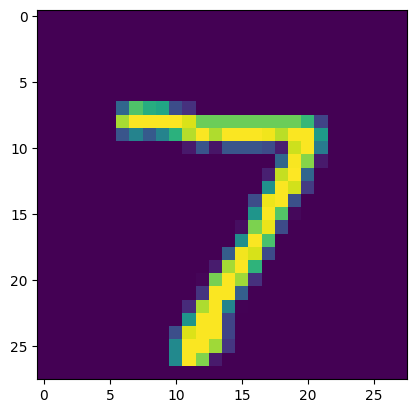

In [7]:
# maplotlib 的 imshow 功能可以顯示 PIL 影像
# 但如果是灰階影像的話，它會幫套上 colormap，所以看起來很像彩色影像

plt.imshow(image)
# plt.imshow(image, cmap="gray") # 若資料是灰階影像，應加上 cmap="gray"

In [8]:
# 觀察有進行 ToTensor() 後的資料

# 取得第一張圖片和標籤
image, label = trainset[0]
print(f"image 的資料格式為: {type(image)}")

image 的資料格式為: <class 'torch.Tensor'>


In [9]:
image.shape

torch.Size([1, 28, 28])

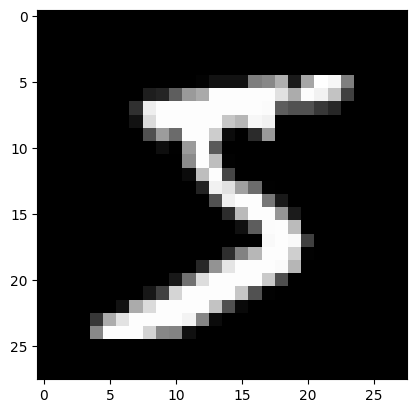

In [10]:
plt.imshow(image.squeeze(), cmap="gray")

In [19]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__() # 繼承 nn.Module 類別的初始化函數
        hidden_size1 = 256 # 第一層隱藏層的神經元數量
        hidden_size2 = 128 # 第二層隱藏層的神經元數量

        self.layer_1 = nn.Linear(28*28, hidden_size1)
        self.layer_2 = nn.Linear(256, hidden_size2)
        self.cls_layer = nn.Linear(hidden_size2, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28) # 將輸入的 x 轉為 28*28 的形狀 (因為 transform.ToTensor() 會把圖片轉為 1*28*28)
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.cls_layer(x)
        return x
trainset, valset = train_test_split(trainset, test_size=0.1, random_state=42)
print(f"MNIST 訓練資料有 {len(trainset)} 筆")
print(f"MNIST 訓練資料有 {len(valset)} 筆")
print(f"MNIST 測試資料有 {len(testset)} 筆")

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

MNIST 訓練資料有 43740 筆
MNIST 訓練資料有 4860 筆
MNIST 測試資料有 10000 筆


In [16]:
train_iter = iter(train_loader)  # 取得迭代器
batch_x, batch_y = next(train_iter) # 取出一個 batch
print(batch_x)
print(batch_y)
print(batch_x.shape)
print(batch_y.shape)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [17]:
# 每次進行 next() 就會取得下一次的迭代

_, batch_y = next(train_iter) # 這邊就單純觀察 y 就好
print(batch_y)
print(batch_y.shape)

tensor([2, 5, 6, 7, 1, 5, 2, 9, 4, 5, 4, 7, 6, 7, 1, 1, 8, 2, 8, 6, 2, 7, 6, 5,
        3, 7, 3, 8, 3, 9, 7, 6, 5, 9, 1, 8, 8, 6, 0, 3, 6, 4, 0, 3, 4, 8, 7, 6,
        8, 2, 0, 1, 0, 8, 6, 8, 9, 7, 2, 3, 4, 5, 8, 3])
torch.Size([64])


Epoch 1/10, Train Loss: 0.3332, Val Loss: 0.1601
Epoch 2/10, Train Loss: 0.1231, Val Loss: 0.1208
Epoch 3/10, Train Loss: 0.0817, Val Loss: 0.1011
Epoch 4/10, Train Loss: 0.0591, Val Loss: 0.1037
Epoch 5/10, Train Loss: 0.0415, Val Loss: 0.1223
Epoch 6/10, Train Loss: 0.0354, Val Loss: 0.1036
Epoch 7/10, Train Loss: 0.0252, Val Loss: 0.0882
Epoch 8/10, Train Loss: 0.0209, Val Loss: 0.0913
Epoch 9/10, Train Loss: 0.0176, Val Loss: 0.1132
Epoch 10/10, Train Loss: 0.0156, Val Loss: 0.1071


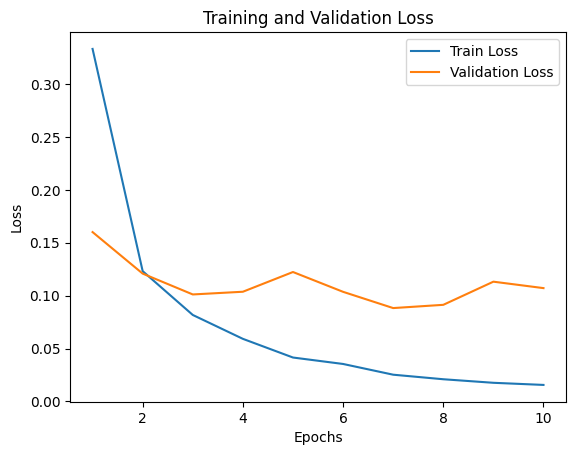

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 初始化模型、損失函數、optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 訓練模型
epochs = 10
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # 驗證模型
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# 繪製 loss 的歷史記錄圖
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
print(outputs.shape)
print(outputs.argmax(dim=1))
print(outputs.argmax(dim=1).shape)

torch.Size([60, 10])
tensor([8, 6, 8, 0, 8, 7, 9, 1, 6, 7, 6, 1, 3, 9, 0, 6, 3, 3, 2, 3, 0, 8, 1, 2,
        9, 2, 7, 3, 8, 3, 5, 9, 1, 9, 2, 4, 6, 2, 4, 9, 6, 6, 3, 5, 7, 1, 7, 2,
        8, 6, 6, 1, 0, 0, 9, 1, 9, 9, 1, 4], device='cuda:0')
torch.Size([60])


In [23]:
model.eval()
predictions = []
test_loss = 0.0 # 在 test 的時候其實不用算 loss，因為通常我們沒有 test set 的標準答案
test_losses = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        tmp_pred = outputs.argmax(dim=1) # tmp_pred 的型態是 tensor
        predictions.extend(tmp_pred.tolist()) # 如果用 append 的話會變成 [[1, 2, 3], [4, 5, 6]]

        loss = criterion(outputs, labels)
        test_loss += loss.item()
test_losses.append(test_loss / len(test_loader))
len(predictions) == len(testset)

True

In [26]:
# 把 testset 中的正確答案取出來
test_labels = [example[1] for example in testset]
accuracy_score(test_labels, predictions)

0.9772